## Visualizing Results

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from typing import Dict, List, Tuple, Set

In [1]:
pwd

'c:\\Users\\super\\Downloads\\School Work\\MUSA 6950\\Final'

In [3]:
def plot_summary_data(folder_path):
    # Initialize dictionaries to store data
    total_counts = {}
    averages = {}
    classes = set()
    
    # Regular expression to extract episode number
    pattern = re.compile(r'ep(\d+)_summary\.csv')
    
    # Process each file in the folder
    for filename in os.listdir(folder_path):
        match = pattern.match(filename)
        if match:
            ep_num = int(match.group(1))
            filepath = os.path.join(folder_path, filename)
            
            try:
                # Read CSV file
                df = pd.read_csv(filepath)
                
                # Check if required columns exist
                if 'total_count' in df.columns and 'average_per_image' in df.columns:
                    # Store data
                    for _, row in df.iterrows():
                        class_name = row.iloc[0]  # First column with empty header
                        classes.add(class_name)
                        
                        if class_name not in total_counts:
                            total_counts[class_name] = []
                        if class_name not in averages:
                            averages[class_name] = []
                            
                        total_counts[class_name].append((ep_num, row['total_count']))
                        averages[class_name].append((ep_num, row['average_per_image']))
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    if not classes:
        print("No valid summary CSV files found.")
        return
    
    # Sort classes for consistent plotting
    sorted_classes = sorted(classes)
    
    # Prepare data for plotting - sort by episode number
    for class_name in sorted_classes:
        total_counts[class_name].sort(key=lambda x: x[0])
        averages[class_name].sort(key=lambda x: x[0])
    
    # Create plots
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Total Count
    plt.subplot(1, 2, 1)
    for class_name in sorted_classes:
        episodes, counts = zip(*total_counts[class_name])
        plt.plot(episodes, counts, label=class_name, marker='o')
    plt.xlabel('Episode Number')
    plt.ylabel('Total Count')
    plt.title('Total Count per Episode')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot 2: Average per Image
    plt.subplot(1, 2, 2)
    for class_name in sorted_classes:
        episodes, avgs = zip(*averages[class_name])
        plt.plot(episodes, avgs, label=class_name, marker='o')
    plt.xlabel('Episode Number')
    plt.ylabel('Average per Image')
    plt.title('Average per Image per Episode')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

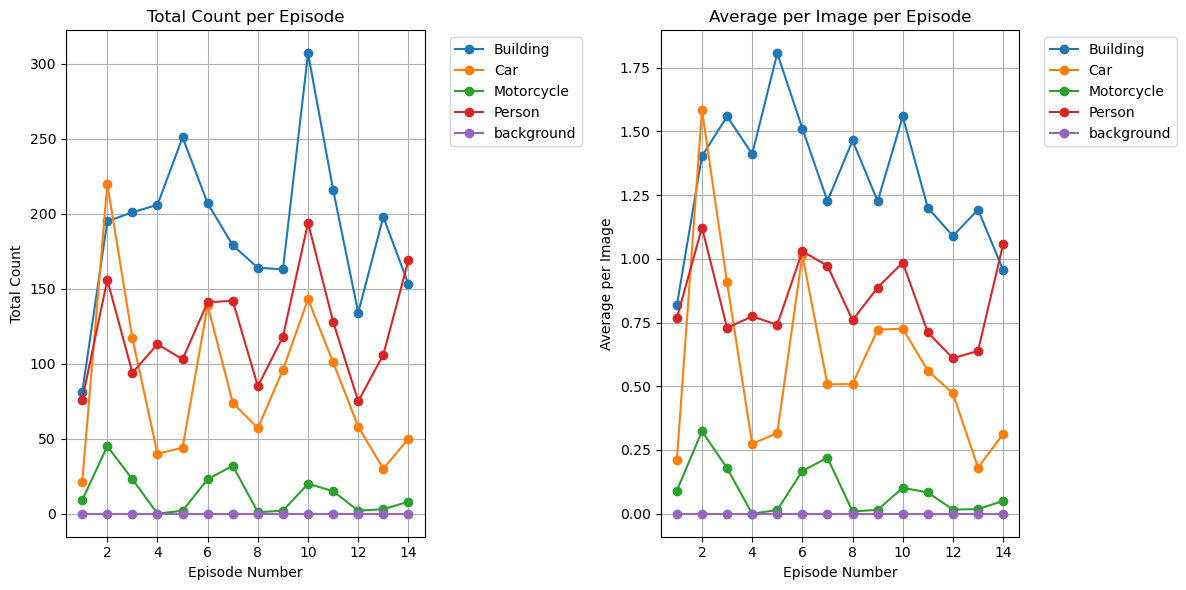

In [4]:
folder_path = "youtube_frames"
plot_summary_data(folder_path)